# Website Page View Analysis

### Questions to Explore
- How has the website performed over time?
- Is there any seasonality to the website?
- How can freeCodeCamp use this data?
- What additional data may be helpful to collect going forward?

### Summary
Since 2016, the freeCodeCamp forum page continues to attract more page views as shown in graph below. The average page views in the forth quarter of 2019 was approximate 131,775. This represents a 307% increase from the third quarter of 2016. 

Taking a closer look at the page views by month, we can see the website does not exhibit seasonality. The page views are fairly steady each month throughout the year. This shows the web page provides consistent value to visitors.

There are many ways freeCodeCamp can utilize this data. First, the company can use the increasing page view data as marketing material to further promote the forum page to users. By showing users that other people are visiting the pages to both find and provide value, they can help continue to drive more web traffic to the page. Second, the company could use the page view data get advertisers. While freeCodeCamp is a non-profit that does not currently have ads on their website, this may be an option should they decide to generate more revenue. Third, the company could use this data to help get funding from grants or funding methods. Having clear data that shows people are visiting their site may help them secure more funding to further their mission of providing free coding resources.

While the page views data over time is useful, it could be more impactful if we had additional data. Some other fields of data that may be worth collecting are the amount of time spent on the forum page, the number of forum posts, the forum topics that receive the most views, and the number of replies received on various forum topics. This is not an exhaustive list, but simply a few other ideas to be able to get more value from the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import CSV file
df = pd.read_csv('Data/fcc-forum-pageviews.csv', index_col='date', parse_dates= ['date'], names=['date', 'page views'], header=0)

df.head()

,page views
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Clean data by removing top and bottom 2.5% of data
df = df[(df['page views'] >= df['page views'].quantile(0.025)) &
        (df['page views'] <= df['page views'].quantile(0.975))]

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views')

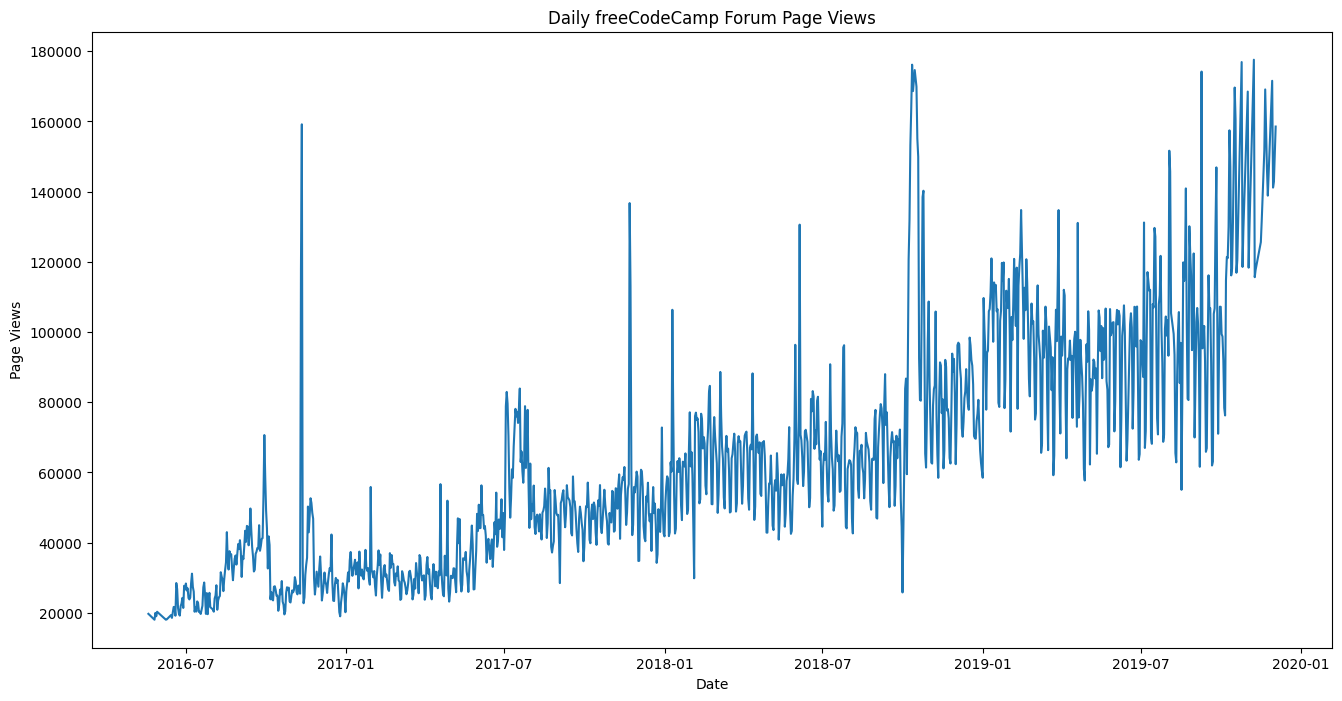

In [4]:
# Create line chart of the page views over time
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=df, x='date', y='page views')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views')

The website has gained traction since 2016 as the number of pages views continues to increase.

In [5]:
# average page views in 3Q2016
page_views_3Q2016 = df['page views'].loc['2016-07-01': '2016-09-30'].mean().round()

page_views_3Q2016

32381.0

In [6]:
# average page views in 4Q2019
page_views_4Q2019 = df['page views'].loc['2019-10-01': '2019-12-31'].mean().round()

page_views_4Q2019

131775.0

In [7]:
# percentage increase in average page views from 3Q2016 to 4Q2019
page_view_inc = ((page_views_4Q2019 / page_views_3Q2016 - 1) * 100).round()

page_view_inc

307.0

In [8]:
# Create a bar chart of average page views per month
df_bar = df.copy()

In [9]:
#create month and year columns
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year

#group by year then month
df_bar = df_bar.groupby(['year', 'month'])['page views'].mean()

#Move months to columns
df_bar = df_bar.unstack()
df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

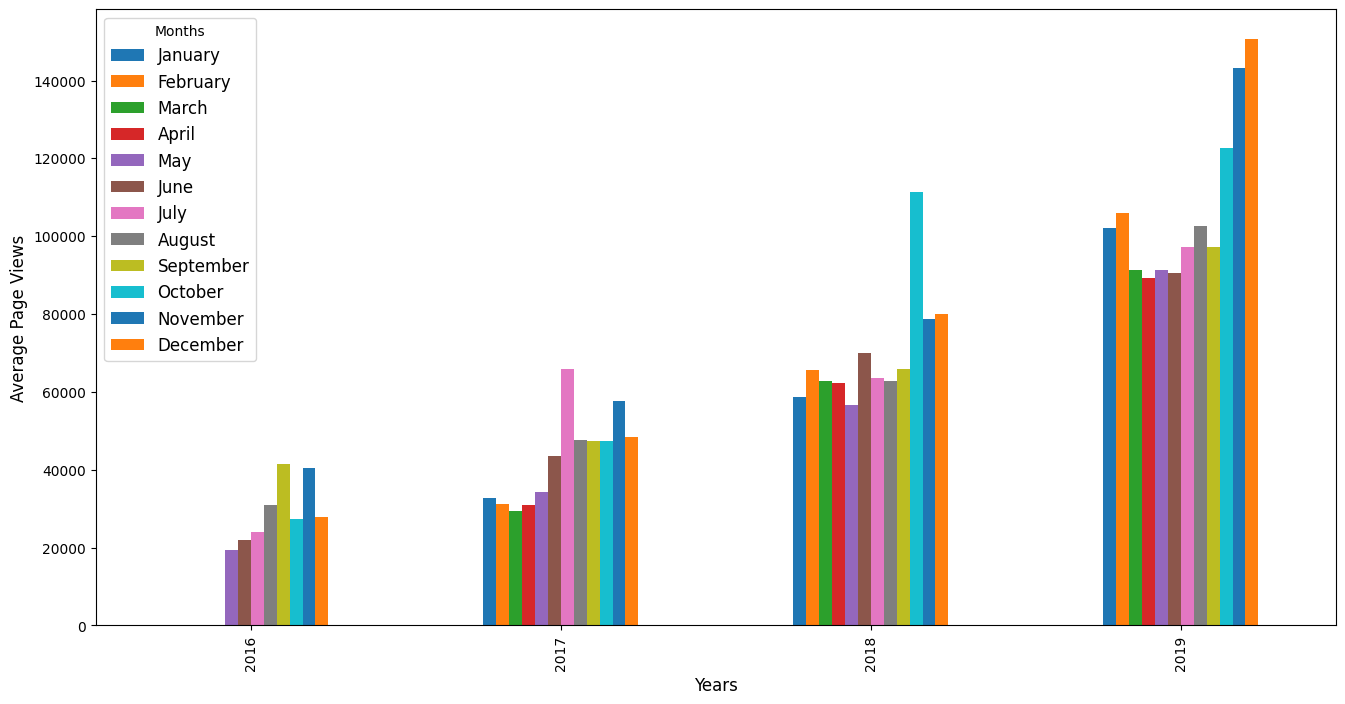

In [10]:
fig = df_bar.plot(kind='bar', figsize=(16,8))

plt.title('')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Page Views', fontsize=12)
plt.legend(loc='upper left', title='Months', fontsize=12)

As reflected in the earlier line chart, the average page views have increased over the years. There does not appear to be a month that receives significantly more web traffic so the website likely provides consistent value throughout the year.

In [11]:
# Create two adjacent box plots to show distribution of page views by year and month
# Start by creating df with year and month columns. Sort by month.
df_box = df.copy().reset_index()
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box['month_num'] = df_box['date'].dt.month
df_box=df_box.sort_values('month_num')

df_box.head()

,date,page views,year,month,month_num
210,2017-01-06,37353,2017,Jan,1
937,2019-01-06,94108,2019,Jan,1
936,2019-01-05,77897,2019,Jan,1
935,2019-01-04,94514,2019,Jan,1
934,2019-01-03,100710,2019,Jan,1


In [12]:
# Find the median page views by month to help describe charts
df_median = df.copy().reset_index()
df_median['year'] = [d.year for d in df_median.date]
df_median['month'] = [d.strftime('%b') for d in df_median.date]
df_median['month_num'] = df_median['date'].dt.month
df_median = df_median.groupby('month')['page views'].median()

df_median.sort_values()

month
Dec    49015.0
Oct    50873.5
Aug    52709.5
Sep    53555.0
May    56037.5
Jun    56734.0
Nov    58565.5
Jan    58910.0
Jul    63413.0
Mar    64835.0
Apr    65127.0
Feb    68745.0
Name: page views, dtype: float64

In [13]:
df_median.max()

68745.0

In [14]:
df_median.min()

49015.0

Text(0, 0.5, 'Page Views')

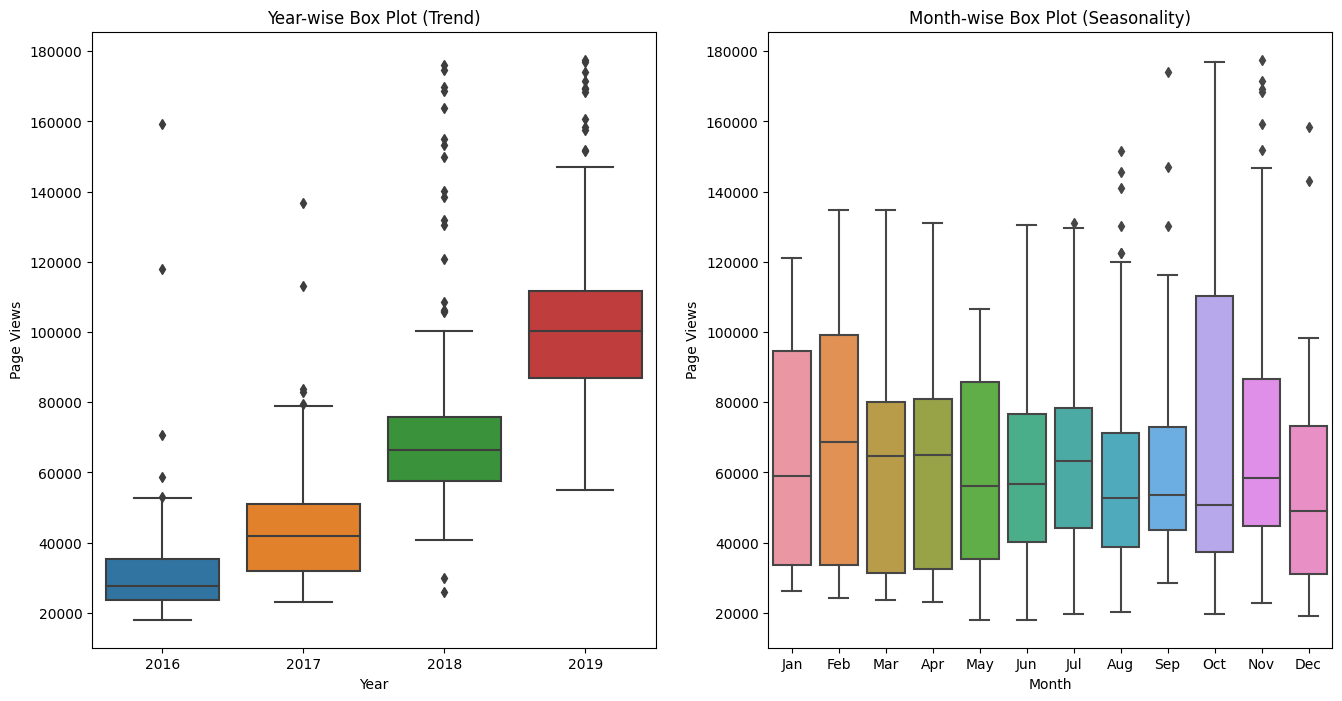

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(ax=ax1, x='year', y='page views', data=df_box)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

sns.boxplot(ax=ax2, x='month', y='page views', data=df_box)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

The Year-wise box plot once again shows growth over the years. The Month-wise chart shows us a fairly consistent range of page views across each month. The median monthly page views ranges from 49,015 to 68,745. The month with the highest median of page views is February, while the month with the lowest median page views is December. 